<a href="https://colab.research.google.com/github/pankajti/qtw/blob/master/Risk_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmms
!pip install pgmpy
!pip install fredapi
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
from IPython.display import clear_output
clear_output()

In [ ]:
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.collections import LineCollection
from statsmodels.graphics import tsaplots
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import seaborn as sns
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import datetime
import hmms

# Step 1



## Forward and backward algorithm
Forward and backward algorithms are used to estimate optimal sequence of hidden states given the model parameters and partially observed sequence.



The forward variable defines as


$$ \alpha_t(i) = p(o_{1, ....,t} , q_t=s_i| \lambda ) $$

### Forward Algorithm

1) Create a table forward[T][N+2]

2) for each state q from 1 to N do :  

> forward[1][q]=p(q|q0)*p(01|q)

end for

for t =2 to T do:
> for each state q from 1 to N do :

> > forward [t][q]=p(ot|q). $\Sigma_{q=q}^N $ forward[T][q].p(qF|q)

>end for

end for

forward[T][qf] = $\Sigma_{q=1}^N$forward[T][q].p(qF|q)







### Backward Algorithm

1) Create a table backward[T][N+2]

2) for each state q from 1 to N do :  

> backward[1][q]=p(qT|qq)*p(0T|qT)

end for

for t =2 to T do:
> for each state q from 1 to N do :

> > backward [t][q]=p(ot|q). $\Sigma_{q'}^N $ backward[t+1][q'].p(ot|q').p(q'|q)

>end for

end for

backward[1][q0] = $\Sigma_{q=1}^N$backward[1][q].p(q0|q)

## Backward Viterbi Algorithm

Viterbi algorithm is a dynamic programming algorithm that determines the most likely state transition path given an observed sequence of symbols.

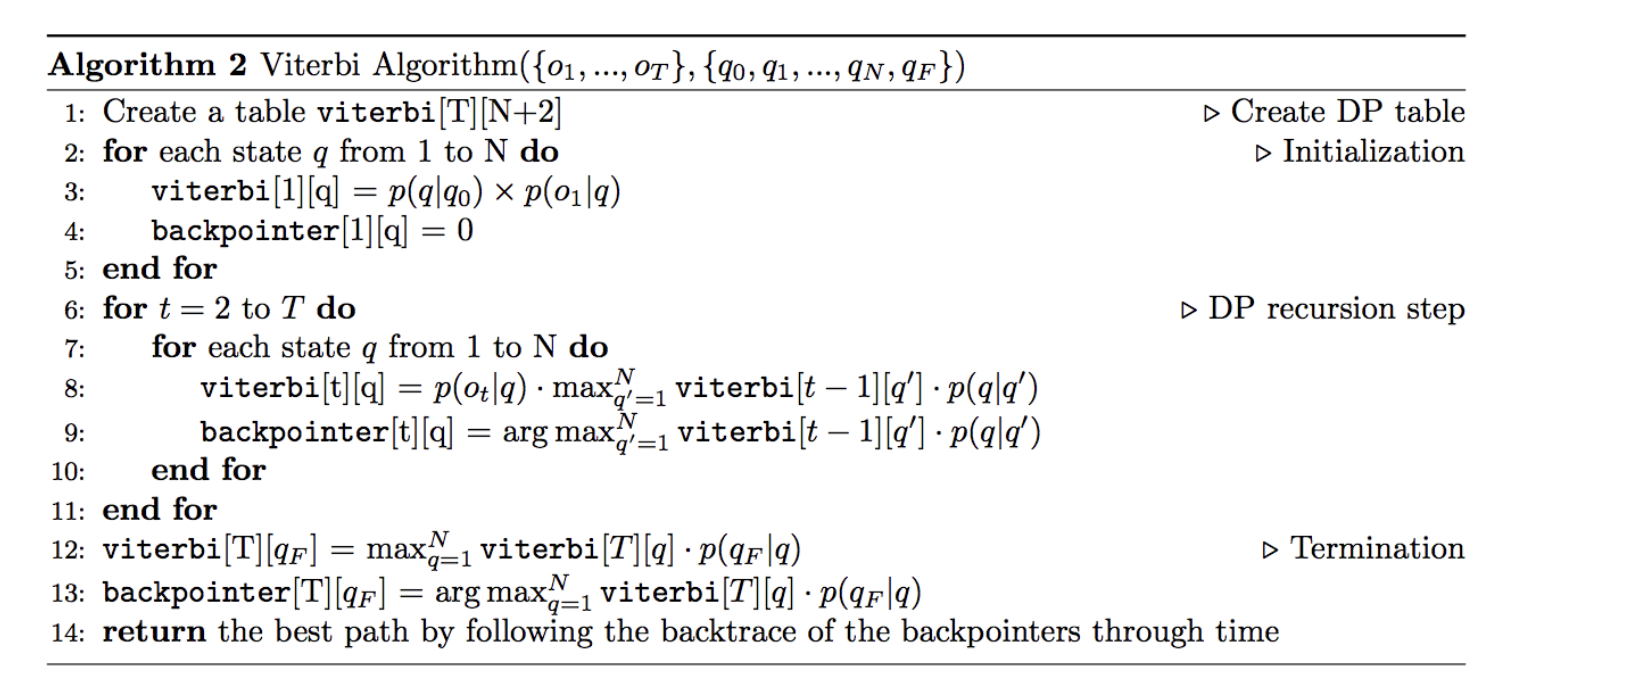

### Viterbi Algorithm

1) Create a table viterbi[T][N+2]

2) for each state q from 1 to N do :

> viterbi[1][q]=p(q|q0)*p(01|q)

> backpointer[1][q]=0

end for

for t =2 to T do:

> for each state q from 1 to N do :

> > viterbi [t][q]=p(ot|q).$Max^N_{𝑞′=1}$ viterbi[t-1][q'].p(ot|q').p(q|q')

> > backpointer [t][q]=arg$Max^N_{𝑞′=1}$ viterbi[t-1][q'].p(ot|q').p(q|q')

> end for

end for

viterbi[T][qF] =  $Max^𝑁_{𝑞=1}$ viterbi[T][q].p(qF|q)

backpointer[T][qF] =  arg$Max^𝑁_{𝑞=1}$ viterbi[T][q].p(qF|q)

## Baum-Welch Algorithm
This algorithm is used to find ideal parameters for λ to maximize and observed sequence of emmissions.

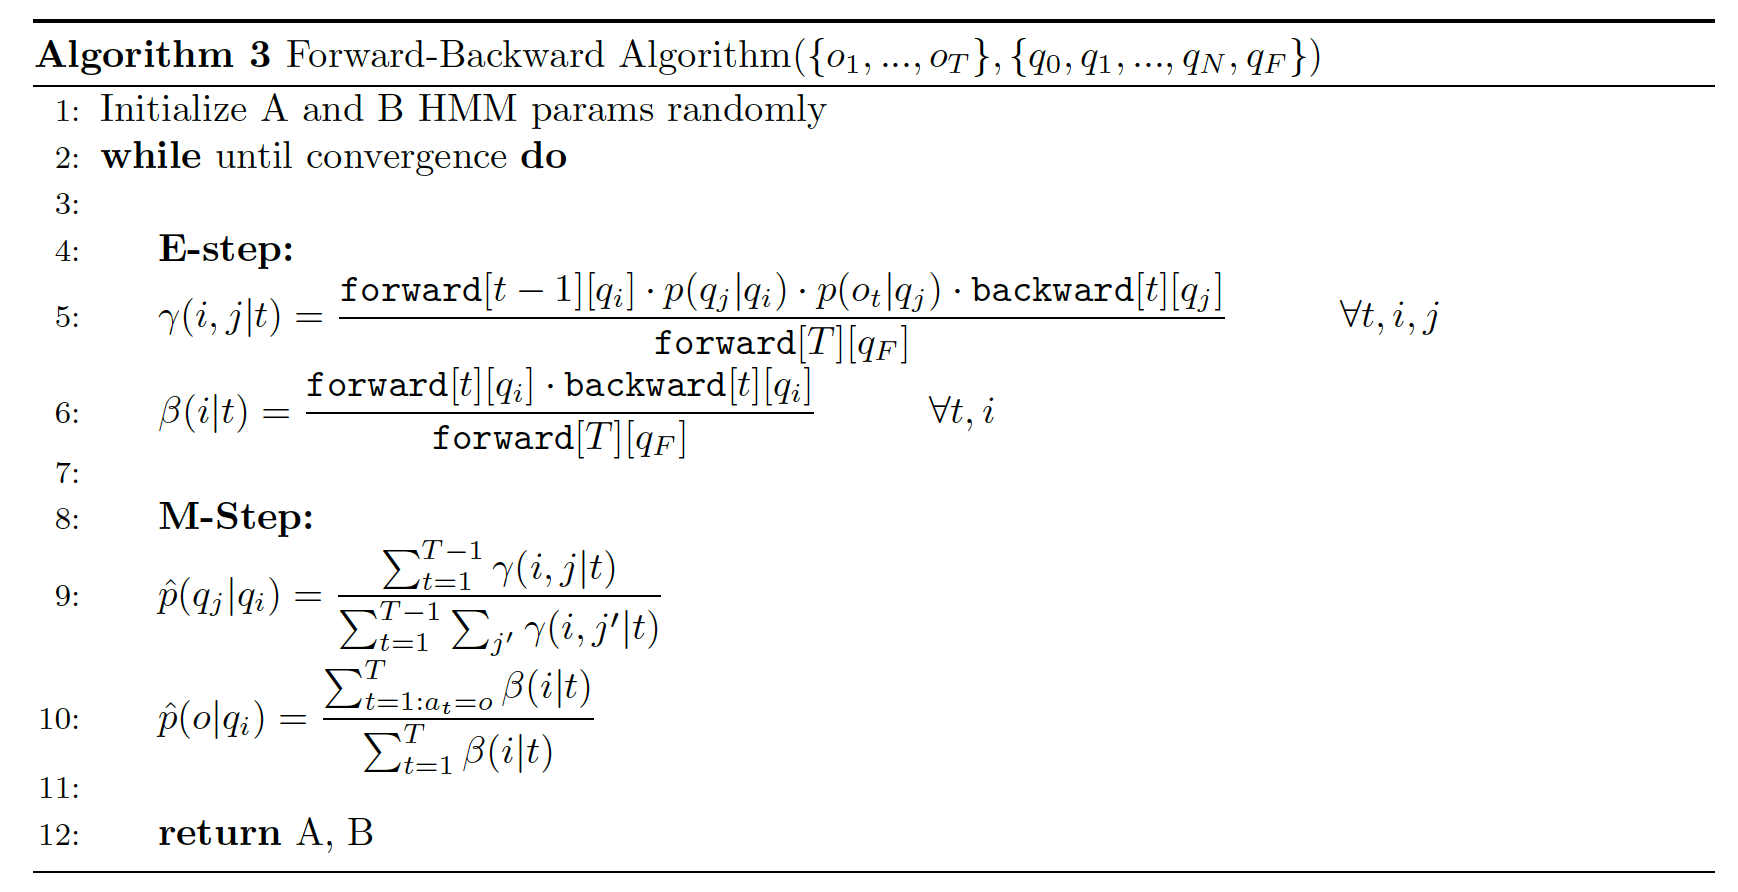

# Step 2



iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 100
iteration  49 / 100
iteration  50 / 100
iteration

,0
0,0.321522
1,0.477433
2,0.201044


Transition probabilities matrix (A):


,0,1,2
0,0.645731,2.253184e-32,0.354269
1,0.000058,9.938804e-01,0.006062
2,0.403660,2.479634e-32,0.596340


Emission probabilities matrix (B):


,0,1
0,0.131845,0.868155
1,0.937017,0.062983
2,0.807023,0.192977


<ipython-input-5-2a653b882c57>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ( log_prob, s_seq ) = dhmm_r.viterbi(np.concatenate(e_seq).ravel());


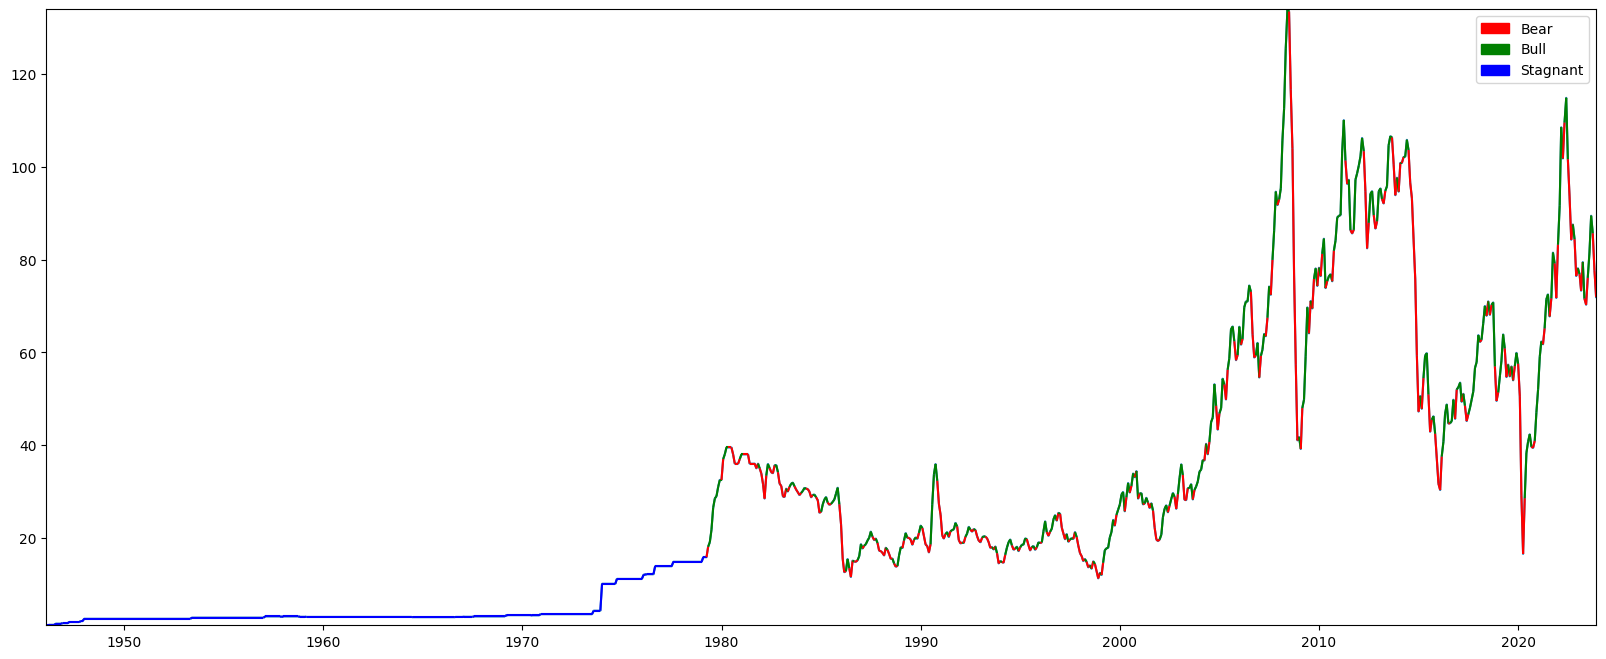

In [ ]:
import hmms
from fredapi import Fred
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm

# FRED API key
fred_key = r'484b16395bfa70e86d649f7d42dc1d4b'
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
price = fred_data['WTISPLC']
price_diff = price.diff()[1:];

e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);
dhmm_r = hmms.DtHMM.random(3 , 2);
e_seq = np.array_split(e_seq, 32);
dhmm_r.baum_welch(e_seq, 100);
hmms.print_parameters( dhmm_r );
( log_prob, s_seq ) = dhmm_r.viterbi(np.concatenate(e_seq).ravel());

price_plot = pd.DataFrame(price[1:], index=price[1:].index);
# Add a column representing the regime
price_plot['Regime'] = s_seq;
# Add a column representing the increase or decrease in price
price_plot['diff'] = price_diff;

means = price_plot.groupby(['Regime'])['diff'].mean();
lst_1 = means.index.tolist();
lst_2 = means.sort_values().index.tolist();
map_regimes = dict(zip(lst_2, lst_1));
price_plot['Regime'] = price_plot['Regime'].map(map_regimes);


fig, ax1 = plt.subplots(figsize=(20,8));
ax1.plot(price_plot['WTISPLC']);
# Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green
cmap = ListedColormap(['r','b','g'],'indexed');
norm = BoundaryNorm(range(3 + 1), cmap.N);
inxval = mdates.date2num(price_plot['WTISPLC'].index.to_pydatetime());
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2);
segments = np.concatenate([points[:-1], points[1:]], axis=1);
lc = LineCollection(segments, cmap=cmap, norm=norm);
lc.set_array(price_plot['Regime']);
plt.gca().add_collection(lc);
plt.xlim(price_plot['WTISPLC'].index.min(), price_plot['WTISPLC'].index.max());
plt.ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max());
r_patch = mpatches.Patch(color='red', label='Bear');
g_patch = mpatches.Patch(color='green', label='Bull');
b_patch = mpatches.Patch(color='blue', label='Stagnant');
plt.legend(handles=[r_patch, g_patch, b_patch]);
plt.show();



## Bull Regime

## Bear Regime

## Stagnent Regime

# Step 3

# Step 4

## Macro Strategy  

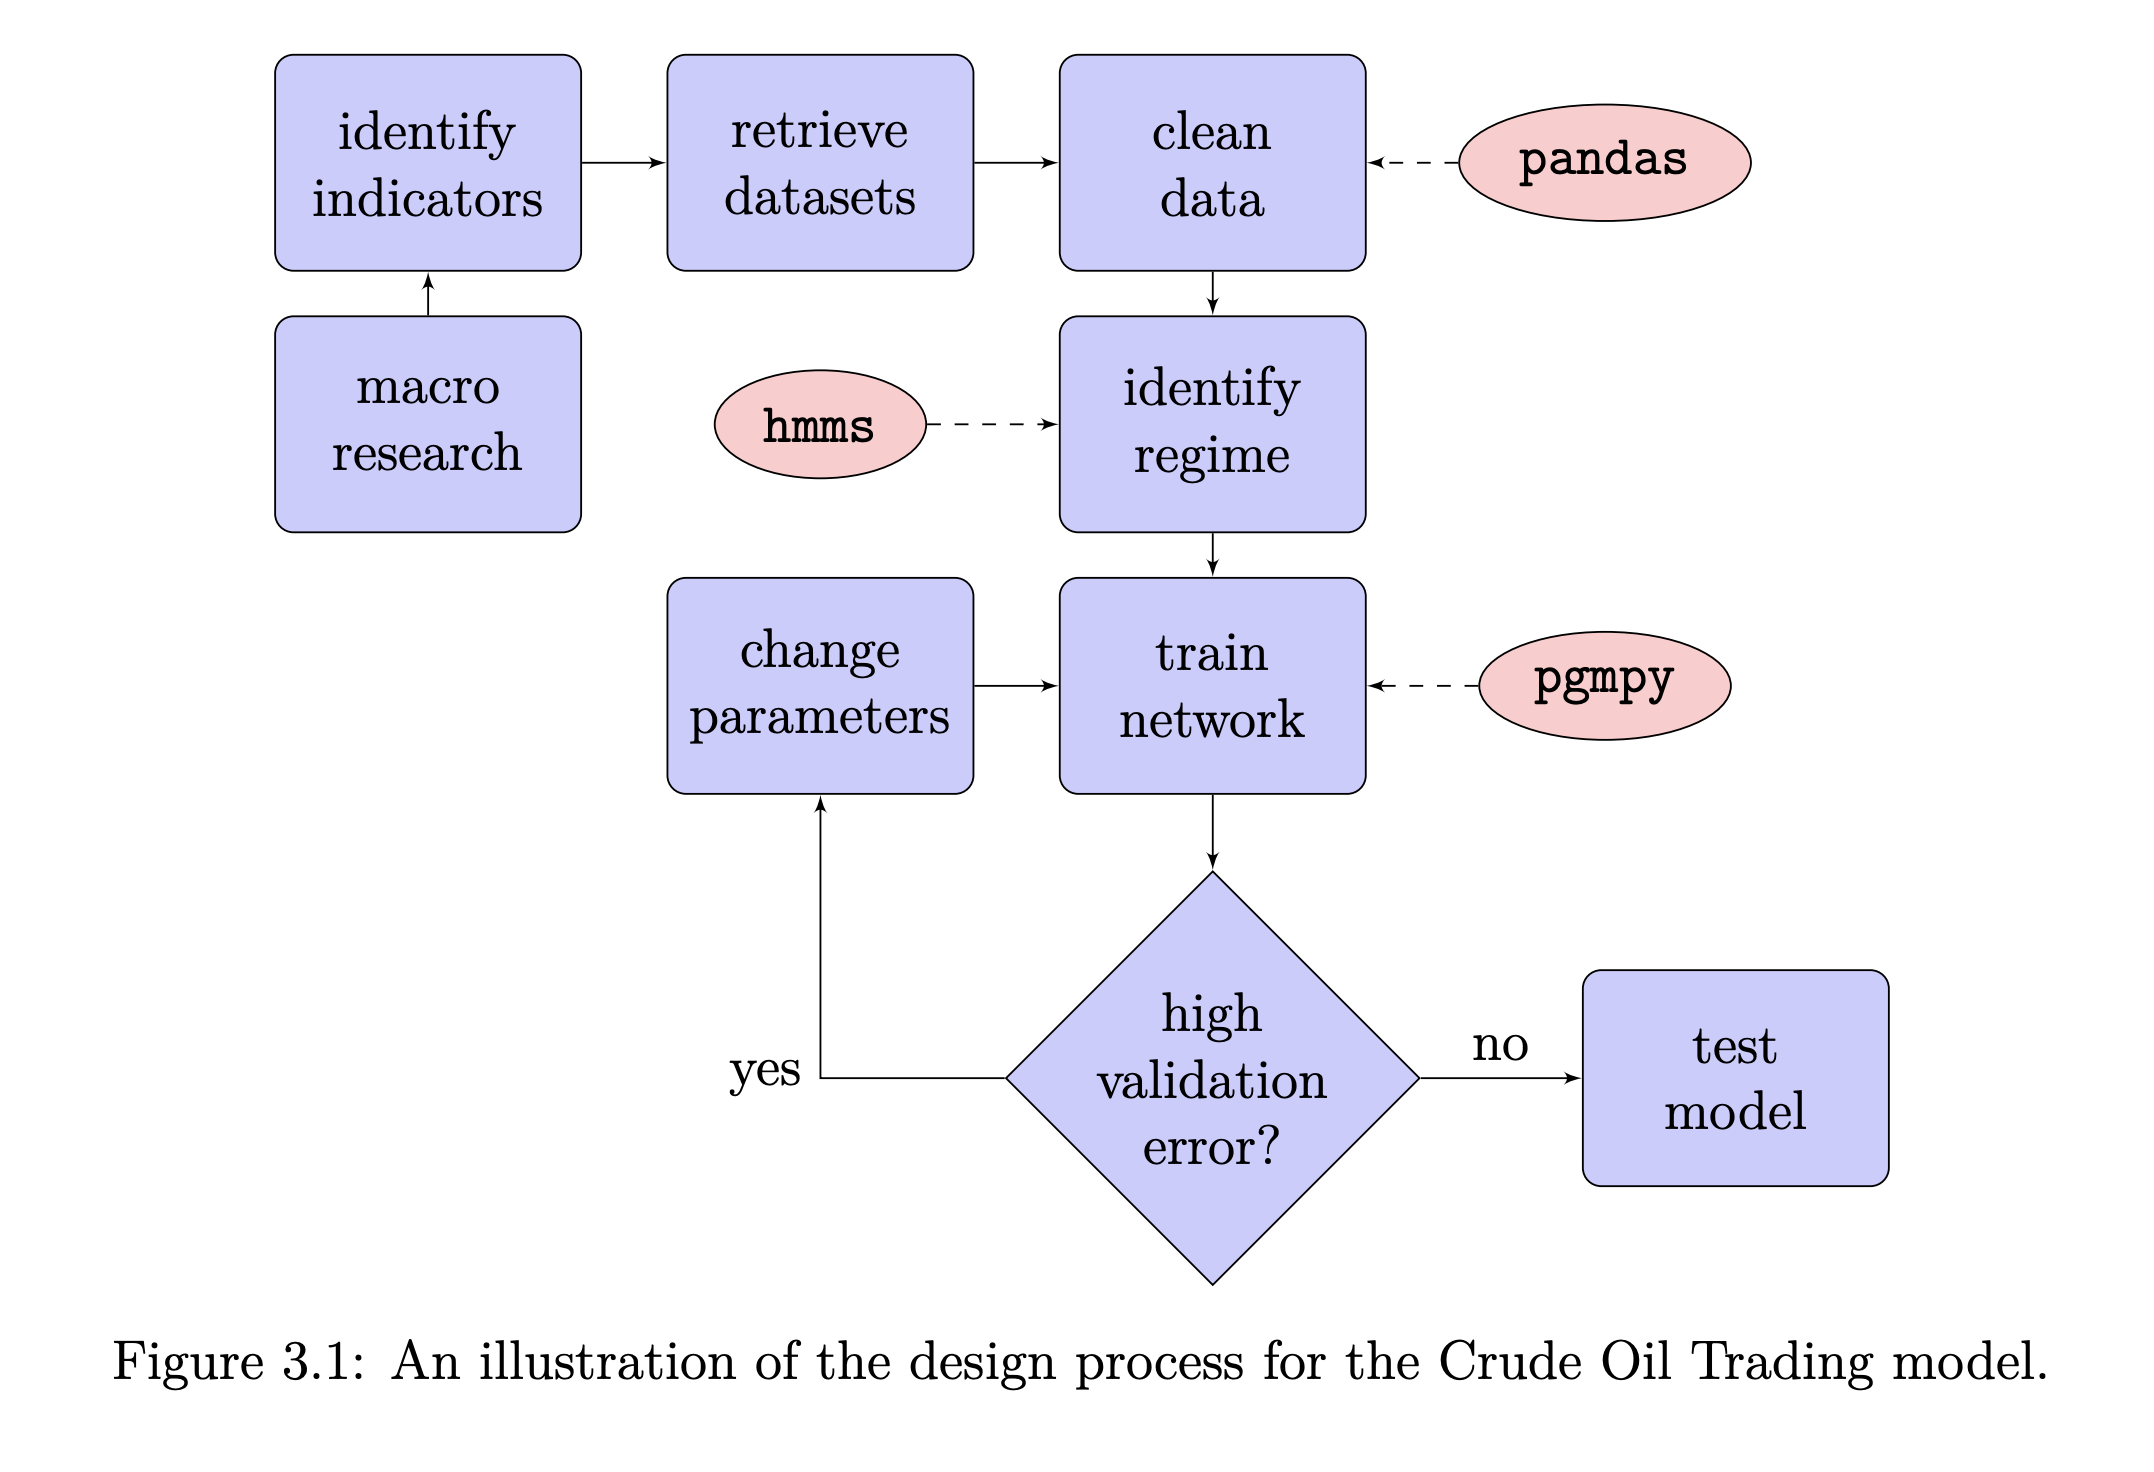

## Research

## Regime Process

## Training

# Step 5

# Step 6

## Transforming The Time Series

## Parameters Learning

## Finding the most likely sequence of hidden states

# Step 7

## latent meaning behind hidden states.

# Step 8

# Step 9

## Hill Climb Search Implementation

## Latent Meaning Behind hidden states

# References

* https://mmz33.github.io/Hidden-Markov-Model/
* https://arxiv.org/pdf/1804.10869.pdf